# People Analytics 
## Predicting Employee Turnover
---

In [ ]:
# packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as sp
import seaborn as sns
from numpy import mean

## 1.0 Data Validation

In [2]:
# loads data set
df = pd.read_excel("C:\\Users\\\harry\\\Desktop\\\github\\resources\\ATTRITION DATA.xlsx")

In [3]:
# checking data dimensions
df.shape

(686, 23)

In [4]:
# checkig column names
df.columns

Index(['e_code', 'status', 'hire_date', 'service_agreement', 'job_level',
       'performance_rating_2018', 'performance_rating_2017', 'year_of_birth',
       'gender', 'distance_from_home', 'manager_changes', 'no_of_promotions',
       'risk_of_attrition', 'potential_rating', 'bonus', 'no_courses_taken',
       'time_in_position', 'awards', 'signon', 'manager_sat', 'employee_sat',
       'salary_2017', 'salary_2018'],
      dtype='object')

In [5]:
# checking top 5 rows of data set
df.head()

,e_code,status,hire_date,service_agreement,job_level,performance_rating_2018,performance_rating_2017,year_of_birth,gender,distance_from_home,...,potential_rating,bonus,no_courses_taken,time_in_position,awards,signon,manager_sat,employee_sat,salary_2017,salary_2018
0,45631,0,1990-09-17,N,3,4,3,1967,M,0.52,...,5,0,8,30,N,N,81,80,119968,124173
1,45632,0,1995-10-23,N,2,1,2,1971,M,0.08,...,5,2242,6,5,N,N,88,84,99330,100822
2,45633,0,1996-03-10,N,2,4,4,1972,M,0.51,...,3,0,2,53,N,N,83,93,102511,115500
3,45634,0,1998-07-13,N,1,3,3,1968,F,0.81,...,5,2320,2,36,N,N,86,83,56674,58806
4,45635,0,1991-09-16,N,2,3,3,1961,M,0.06,...,5,0,10,2,N,N,79,80,122021,122021


In [6]:
# checking data types
df.dtypes

e_code                              int64
status                              int64
hire_date                  datetime64[ns]
service_agreement                  object
job_level                           int64
performance_rating_2018             int64
performance_rating_2017             int64
year_of_birth                       int64
gender                             object
distance_from_home                float64
manager_changes                     int64
no_of_promotions                    int64
risk_of_attrition                   int64
potential_rating                    int64
bonus                               int64
no_courses_taken                    int64
time_in_position                    int64
awards                             object
signon                             object
manager_sat                         int64
employee_sat                        int64
salary_2017                         int64
salary_2018                         int64
dtype: object

In [7]:
# converting number variables into categories
cols = ['status','job_level','no_of_promotions','risk_of_attrition','potential_rating']

for col in cols:
    df[col] = df[col].astype('category')

In [8]:
# checking data types 2
df.dtypes

e_code                              int64
status                           category
hire_date                  datetime64[ns]
service_agreement                  object
job_level                        category
performance_rating_2018             int64
performance_rating_2017             int64
year_of_birth                       int64
gender                             object
distance_from_home                float64
manager_changes                     int64
no_of_promotions                 category
risk_of_attrition                category
potential_rating                 category
bonus                               int64
no_courses_taken                    int64
time_in_position                    int64
awards                             object
signon                             object
manager_sat                         int64
employee_sat                        int64
salary_2017                         int64
salary_2018                         int64
dtype: object

## 2.0 Descriptive Statistics (Univeriate Analysis)

In [9]:
# displaying summary of data
df.describe()

,e_code,performance_rating_2018,performance_rating_2017,year_of_birth,distance_from_home,manager_changes,bonus,no_courses_taken,time_in_position,manager_sat,employee_sat,salary_2017,salary_2018
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,46015.237609,2.895044,2.967930,1972.532070,3.204534,2.332362,1097.536443,3.247813,27.345481,82.177843,81.214286,114289.116618,119135.456268
std,214.878836,1.124669,0.674125,7.734348,8.441646,2.431611,2128.097198,3.063291,31.375641,4.838758,5.005909,60820.924620,60925.702367
min,45631.000000,1.000000,1.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,70.000000,39600.000000,43903.000000
25%,45833.250000,2.000000,3.000000,1966.000000,0.242500,0.000000,0.000000,1.000000,7.000000,79.000000,80.000000,77033.750000,81840.000000
50%,46017.500000,3.000000,3.000000,1973.000000,0.450000,2.000000,0.000000,2.000000,18.000000,79.000000,80.000000,98000.000000,102716.000000
75%,46199.750000,4.000000,3.000000,1979.000000,0.980000,4.000000,2051.000000,4.000000,37.000000,85.000000,80.000000,125705.500000,132000.000000
max,46387.000000,5.000000,4.000000,1990.000000,50.000000,15.000000,19853.000000,20.000000,278.000000,100.000000,100.000000,511500.000000,511500.000000


In [10]:
# display summary of non-numerical data
# df.describe(include='category')

## 3.0 Detecting Missing Values

In [11]:
# checking if there are missing values
df.isna().sum() 

e_code                     0
status                     0
hire_date                  0
service_agreement          0
job_level                  0
performance_rating_2018    0
performance_rating_2017    0
year_of_birth              0
gender                     0
distance_from_home         0
manager_changes            0
no_of_promotions           0
risk_of_attrition          0
potential_rating           0
bonus                      0
no_courses_taken           0
time_in_position           0
awards                     0
signon                     0
manager_sat                0
employee_sat               0
salary_2017                0
salary_2018                0
dtype: int64

In [12]:
# no missing values

## 4.0 Feature Engineering

In [13]:
# creating new variable for Performance Rating
# var_rating is the difference in performance rating of 2018 and 2017
df['var_rating']=df['performance_rating_2018']-df['performance_rating_2017']

In [14]:
# convert numerical variable into categorical variable
cols = ['var_rating']

for col in cols:
    df[col] = df[col].astype('category')

In [15]:
print(df.var_rating)

0      1
1     -1
2      0
3      0
4      0
      ..
681    0
682   -1
683    0
684    0
685    0
Name: var_rating, Length: 686, dtype: category
Categories (5, int64): [-3, -1, 0, 1, 2]


In [16]:
# creating new variable for salary change rate
# percentage_salary_change is the percent salary hike of employees from 2017 to 2018
df['percentage_salary_change']=(df['salary_2018']-df['salary_2017'])/100

In [17]:
print(df.percentage_salary_change)

0       42.05
1       14.92
2      129.89
3       21.32
4        0.00
        ...  
681      9.01
682      9.01
683      9.01
684      9.01
685     19.00
Name: percentage_salary_change, Length: 686, dtype: float64


In [18]:
# calculating age of employee by subtracting year of birth from 2018
df['age']=2018-df['year_of_birth']

In [19]:
# displaying age
print(df.age)

0      51
1      47
2      46
3      50
4      57
       ..
681    52
682    37
683    51
684    38
685    55
Name: age, Length: 686, dtype: int64


In [20]:
df.describe()

,e_code,performance_rating_2018,performance_rating_2017,year_of_birth,distance_from_home,manager_changes,bonus,no_courses_taken,time_in_position,manager_sat,employee_sat,salary_2017,salary_2018,percentage_salary_change,age
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,46015.237609,2.895044,2.967930,1972.532070,3.204534,2.332362,1097.536443,3.247813,27.345481,82.177843,81.214286,114289.116618,119135.456268,48.463397,45.467930
std,214.878836,1.124669,0.674125,7.734348,8.441646,2.431611,2128.097198,3.063291,31.375641,4.838758,5.005909,60820.924620,60925.702367,61.515808,7.734348
min,45631.000000,1.000000,1.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,70.000000,39600.000000,43903.000000,0.000000,28.000000
25%,45833.250000,2.000000,3.000000,1966.000000,0.242500,0.000000,0.000000,1.000000,7.000000,79.000000,80.000000,77033.750000,81840.000000,12.425000,39.000000
50%,46017.500000,3.000000,3.000000,1973.000000,0.450000,2.000000,0.000000,2.000000,18.000000,79.000000,80.000000,98000.000000,102716.000000,27.245000,45.000000
75%,46199.750000,4.000000,3.000000,1979.000000,0.980000,4.000000,2051.000000,4.000000,37.000000,85.000000,80.000000,125705.500000,132000.000000,55.287500,52.000000
max,46387.000000,5.000000,4.000000,1990.000000,50.000000,15.000000,19853.000000,20.000000,278.000000,100.000000,100.000000,511500.000000,511500.000000,461.930000,59.000000


In [21]:
df.describe(include='category')

,status,job_level,no_of_promotions,risk_of_attrition,potential_rating,var_rating
count,686,686,686,686,686,686
unique,2,5,9,4,5,5
top,0,1,0,2,3,0
freq,516,353,473,301,225,413


In [22]:
# dropping variables were used to create new variables
df=df.drop(['year_of_birth', 'salary_2017', 'salary_2018', 'performance_rating_2017', 'performance_rating_2018'],axis=1) 

In [23]:
# df=df.drop(['hire_date', 'e_code'],axis=1) 

## 5.0 Bi-variate Analysys (Categorical-Categorical)

* Active Status VS Gender

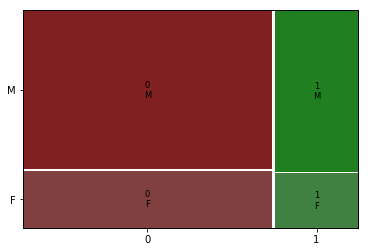

In [24]:
# visual approach, creating a mosaic plot
mosaic(df,['status','gender'], gap=0.01)
plt.show()

In [25]:
pd.crosstab(df.status,df.gender)

gender,F,M
status,,
0,136,380
1,43,127


In [26]:
# Row wise percentage 
# Insight: Row proportion table suggests that 74.71% of employees who left were male
pd.crosstab(df.status,df.gender,normalize='index')

gender,F,M
status,,
0,0.263566,0.736434
1,0.252941,0.747059


In [27]:
# Columm wise percentage 
# Assumption: It seems Employees do not leave based on their gender as the values in the column proportion table are same
pd.crosstab(df.status,df.gender,normalize='columns')

gender,F,M
status,,
0,0.759777,0.749507
1,0.240223,0.250493


* Active Status VS Service Agreement

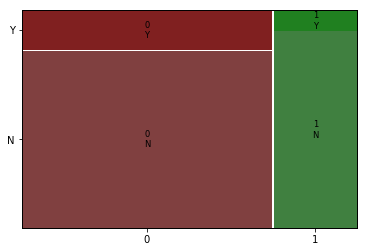

In [28]:
mosaic(df,['status','service_agreement'])
plt.show()

In [29]:
pd.crosstab(df.status, df.service_agreement)

service_agreement,N,Y
status,,
0,422,94
1,154,16


In [30]:
# Insight: Row proportion table suggests out of all employees who left, 90.59% did not had a service agreement
pd.crosstab(df.status, df.service_agreement,normalize='index')

service_agreement,N,Y
status,,
0,0.817829,0.182171
1,0.905882,0.094118


In [31]:
# Assumption: It seem employees who did not have a service agreement preffered to leave the company as the value in column proportion table is 26.74%
pd.crosstab(df.status, df.service_agreement, normalize='columns')

service_agreement,N,Y
status,,
0,0.732639,0.854545
1,0.267361,0.145455


* Active Status VS Job Level

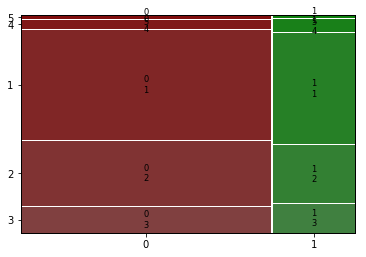

In [32]:
mosaic(df,['status','job_level'])
plt.show()

In [33]:
pd.crosstab(df.status, df.job_level)

job_level,1,2,3,4,5
status,,,,,
0,265,158,62,22,9
1,88,46,23,11,2


In [34]:
pd.crosstab(df.status, df.job_level, normalize='index')
# Insight: Row proportion table suggests out of all employees who left, 51.76% had level_map as 1.
# Insight: Row proportion table suggests out of all employees who left,1.18% had level_map as 5.

job_level,1,2,3,4,5
status,,,,,
0,0.513566,0.306202,0.120155,0.042636,0.017442
1,0.517647,0.270588,0.135294,0.064706,0.011765


In [35]:
pd.crosstab(df.status, df.job_level, normalize='columns')
# Assumption: Column proportion table suggests employees with level map 5(18.18%) and 2(22.55%) do not prefer to leave the campany in comparison to employees with level map 3(27.06%), 4(33.33%) and 1(24.93%)

job_level,1,2,3,4,5
status,,,,,
0,0.750708,0.77451,0.729412,0.666667,0.818182
1,0.249292,0.22549,0.270588,0.333333,0.181818


* Active Status VS Variance in Performance Rating(var_rating)

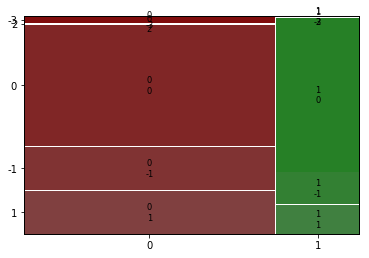

In [36]:
mosaic(df,['status','var_rating'])
plt.show()

In [37]:
pd.crosstab(df.status, df.var_rating)

var_rating,-3,-1,0,1,2
status,,,,,
0,16,105,291,103,1
1,0,25,122,23,0


In [38]:
pd.crosstab(df.status, df.var_rating, normalize='index')
# Row proportion table suggests out of all the employees who left,71.76% had var_Rating as 0.
# Row proportion table suggests out of all the employees who left, no one had var_Rating as -3 or 2.

var_rating,-3,-1,0,1,2
status,,,,,
0,0.031008,0.203488,0.563953,0.199612,0.001938
1,0.000000,0.147059,0.717647,0.135294,0.000000


In [39]:
pd.crosstab(df.status, df.var_rating, normalize='columns')
# Column proportion table suggests maximum employees leave who have variance in rating 0(29.54%).
# Column proportion table suggests minimum employees leave who have variance in rating -3 and 2(0%).


var_rating,-3,-1,0,1,2
status,,,,,
0,1.0,0.807692,0.7046,0.81746,1.0
1,0.0,0.192308,0.2954,0.18254,0.0


* Active Status VS Number of Promotions

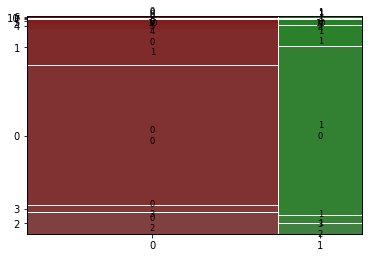

In [40]:
mosaic(df,['status','no_of_promotions'])
plt.show()

In [41]:
pd.crosstab(df.status, df.no_of_promotions)

no_of_promotions,0,1,2,3,4,5,6,7,10
status,,,,,,,,,
0,338,88,51,16,13,6,1,2,1
1,135,16,8,6,4,0,1,0,0


In [42]:
pd.crosstab(df.status, df.no_of_promotions, normalize='index')
# Row proportion table suggests out of all the employees who left, 79.41% had 0 promotions.
# Row proportion table suggests out of all the employees who left, no one had 5,7 or 10 promotions.

no_of_promotions,0,1,2,3,4,5,6,7,10
status,,,,,,,,,
0,0.655039,0.170543,0.098837,0.031008,0.025194,0.011628,0.001938,0.003876,0.001938
1,0.794118,0.094118,0.047059,0.035294,0.023529,0.000000,0.005882,0.000000,0.000000


In [43]:
pd.crosstab(df.status, df.no_of_promotions, normalize='columns')
# Column proportion table suggests maximum employees leave who have 6 promotions(50%).
# Column proportion table suggests minimum employees leave who have 5,7 and 10 promotions(0%).

no_of_promotions,0,1,2,3,4,5,6,7,10
status,,,,,,,,,
0,0.714588,0.846154,0.864407,0.727273,0.764706,1.0,0.5,1.0,1.0
1,0.285412,0.153846,0.135593,0.272727,0.235294,0.0,0.5,0.0,0.0


* Active Status vs Risk of Attrition

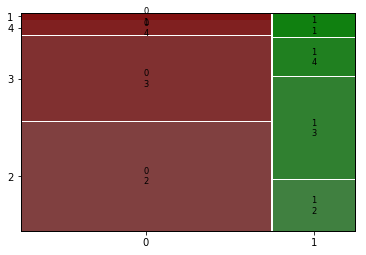

In [44]:
mosaic(df,['status','risk_of_attrition'])
plt.show()

In [45]:
pd.crosstab(df.status, df.risk_of_attrition)

risk_of_attrition,1,2,3,4
status,,,,
0,15,261,204,36
1,19,40,81,30


In [46]:
pd.crosstab(df.status, df.risk_of_attrition, normalize='index')
# Row proportion table suggests out of all the employees who left,47.65% had a flight_risk of 3.
# Row proportion table suggests out of all the employees who left,11.18% had a flight_risk of 1.

risk_of_attrition,1,2,3,4
status,,,,
0,0.029070,0.505814,0.395349,0.069767
1,0.111765,0.235294,0.476471,0.176471


In [47]:
pd.crosstab(df.status, df.risk_of_attrition, normalize='columns')
# Column proportion table suggests maximum employees leave who have flight risk 1(55.88%).
# Column proportion table suggests minimum employees leave who have flight risk 2(13.29%).

risk_of_attrition,1,2,3,4
status,,,,
0,0.441176,0.86711,0.715789,0.545455
1,0.558824,0.13289,0.284211,0.454545


* Active Status VS Potential Rating

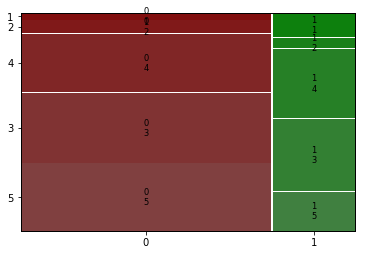

In [48]:
mosaic(df,['status','potential_rating'])
plt.show()

In [49]:
pd.crosstab(df.status, df.potential_rating)

potential_rating,1,2,3,4,5
status,,,,,
0,15,30,168,141,162
1,19,8,57,55,31


In [50]:
pd.crosstab(df.status, df.potential_rating, normalize='index')
# Row proportion table suggests out of all employees who left,33.35% had potential as 3.
# Row proportion table suggests out of all employees who left,4.71% had potential as 2.

potential_rating,1,2,3,4,5
status,,,,,
0,0.029070,0.058140,0.325581,0.273256,0.313953
1,0.111765,0.047059,0.335294,0.323529,0.182353


In [51]:
pd.crosstab(df.status, df.potential_rating, normalize='columns')
# Column proportion table suggests maximum employees leave who have potenial 1(55.88%).
# Column proportion table suggests minimum employees leave who have potenial 5(16.06%).

potential_rating,1,2,3,4,5
status,,,,,
0,0.441176,0.789474,0.746667,0.719388,0.839378
1,0.558824,0.210526,0.253333,0.280612,0.160622


* Active Status VS Awards

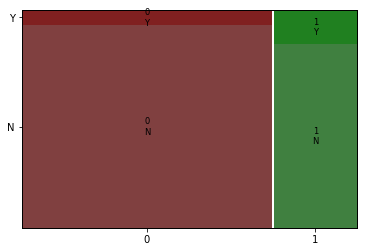

In [52]:
mosaic(df,['status','awards'])
plt.show()

In [53]:
pd.crosstab(df.status, df.awards)

awards,N,Y
status,,
0,482,34
1,144,26


In [54]:
pd.crosstab(df.status, df.awards, normalize='index')
# Insight: Row proportion table suggests out of all employees who left, 84.71% had not recieved any awards.
# Insight: Also indicating 94% of active employees also were not awarded

awards,N,Y
status,,
0,0.934109,0.065891
1,0.847059,0.152941


In [55]:
# Insight: Column proportion table suggests employees who received awards preferred to leave the company(43.33%) in comparison to people who did not receive awards(22.67%).
pd.crosstab(df.status, df.awards, normalize='columns')

awards,N,Y
status,,
0,0.769968,0.566667
1,0.230032,0.433333


* Active Status VS Sign On Bonus

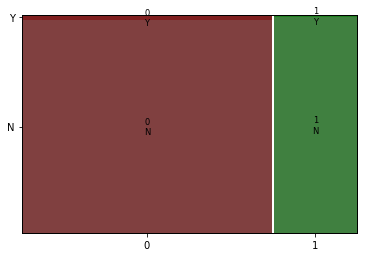

In [56]:
mosaic(df,['status','signon'])
plt.show()

In [57]:
pd.crosstab(df.status, df.signon)

signon,N,Y
status,,
0,506,10
1,169,1


In [58]:
pd.crosstab(df.status, df.signon, normalize='index')
# Insight: Row proportion table suggests out of all employees who left,99.41% did not receive a sign on bonus

signon,N,Y
status,,
0,0.980620,0.019380
1,0.994118,0.005882


In [59]:
pd.crosstab(df.status, df.signon, normalize='columns')
# Insight: Column proportion table suggests employees who received a sign on bonus preferred to stay at the company(90.91%) in comparison to people who did not receive a sign on bonus(75.34%)

signon,N,Y
status,,
0,0.74963,0.909091
1,0.25037,0.090909


## 6.0 Hypothesis Test (Categorical and Categorical)

In [60]:
#### Chi_Square #### 부하
# step 1 : Formulating hypothesis
# H0: employee gender and active status are independent
# HA: employee gender and active status are dependent

# step 2 : Choosing the test
# Chi-Square

# step 3 : Choosing significance level
# 0.05

# step 4 : Apply the test and find p-value
table = pd.crosstab(df['gender'], df['status'])

sp.chi2_contingency(table)

# step 5 : compare p-value and the significance level

# conclusion : P Value = 0.86. p-value is greater than 0.05 we accept the null hypothesis

(0.02989476143031883,
 0.8627292328103568,
 1,
 array([[134.64139942,  44.35860058],
        [381.35860058, 125.64139942]]))

In [61]:
#### Chi_Square #### 
# step 1 : Formulating hypothesis
# H0: employee service agreement and active status are independent
# HA: employee service agreement and active status are dependent

# step 2 : Choosing the test
# Chi-Square

# step 3 : Choosing significance level
# 0.05

# step 4 : Apply the test and find p-value
table = pd.crosstab(df['service_agreement'], df['status'])

sp.chi2_contingency(table)

# step 5 : compare p-value and the significance level

# conclusion : P Value = 0.0095. p-value is less than 0.05 we reject the null hypothesis

(6.72420174117774,
 0.009511328983283338,
 1,
 array([[433.25947522, 142.74052478],
        [ 82.74052478,  27.25947522]]))

In [62]:
# H0: employee job level and active status are independent
# HA: employee job level and active status are dependent
table = pd.crosstab(df['job_level'], df['status'])
sp.chi2_contingency(table)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.

(2.337844062473902,
 0.6738877352129603,
 4,
 array([[265.52186589,  87.47813411],
        [153.44606414,  50.55393586],
        [ 63.93586006,  21.06413994],
        [ 24.82215743,   8.17784257],
        [  8.27405248,   2.72594752]]))

In [63]:
# H0: employee no of promotions and active status are independent
# HA: employee no of promotions and active status are dependent
table = pd.crosstab(df['no_of_promotions'], df['status'])
sp.chi2_contingency(table)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent.

(16.234810070749838,
 0.03913994369619338,
 8,
 array([[3.55784257e+02, 1.17215743e+02],
        [7.82274052e+01, 2.57725948e+01],
        [4.43790087e+01, 1.46209913e+01],
        [1.65481050e+01, 5.45189504e+00],
        [1.27871720e+01, 4.21282799e+00],
        [4.51311953e+00, 1.48688047e+00],
        [1.50437318e+00, 4.95626822e-01],
        [1.50437318e+00, 4.95626822e-01],
        [7.52186589e-01, 2.47813411e-01]]))

In [64]:
# H0: employee risk of attrition and active status are independent
# HA: employee risk of attrition and active status are dependent
table = pd.crosstab(df['risk_of_attrition'], df['status'])
sp.chi2_contingency(table)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent.

(56.128165504639895,
 3.944526151206098e-12,
 3,
 array([[ 25.57434402,   8.42565598],
        [226.40816327,  74.59183673],
        [214.37317784,  70.62682216],
        [ 49.64431487,  16.35568513]]))

In [65]:
# H0: employee potential rating and active status are independent
# HA: employee potential rating and active status are dependent
table = pd.crosstab(df['potential_rating'], df['status'])
sp.chi2_contingency(table)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent.

(26.966061641155147,
 2.019545165087339e-05,
 4,
 array([[ 25.57434402,   8.42565598],
        [ 28.58309038,   9.41690962],
        [169.24198251,  55.75801749],
        [147.42857143,  48.57142857],
        [145.17201166,  47.82798834]]))

In [66]:
# H0: employee awards and active status are independent
# HA: employee awards and active status are dependent
table = pd.crosstab(df['awards'], df['status'])
sp.chi2_contingency(table)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent.

(11.074199327587491,
 0.000875372103862832,
 1,
 array([[470.86880466, 155.13119534],
        [ 45.13119534,  14.86880466]]))

In [67]:
# H0: employee sign on bonus and active status are independent
# HA: employee sign on bonus and active status are dependent
table = pd.crosstab(df['signon'], df['status'])
sp.chi2_contingency(table)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.

(0.7449395397968127,
 0.3880831472807692,
 1,
 array([[507.72594752, 167.27405248],
        [  8.27405248,   2.72594752]]))

In [68]:
# H0: employee variance in rating and active status are independent
# HA: employee variance in rating and active status are dependent
table = pd.crosstab(df['var_rating'], df['status'])
sp.chi2_contingency(table)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent.

(15.646652000534539,
 0.0035318724704160947,
 4,
 array([[1.20349854e+01, 3.96501458e+00],
        [9.77842566e+01, 3.22157434e+01],
        [3.10653061e+02, 1.02346939e+02],
        [9.47755102e+01, 3.12244898e+01],
        [7.52186589e-01, 2.47813411e-01]]))

## 7.0 Bivariate Test (Numerical-Categorical)

* Age VS Active Status

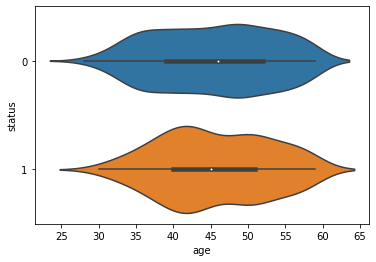

In [69]:
sns.violinplot(data=df, x='age', y='status', orient="h")
plt.show() 


In [70]:
df.pivot_table('age','status', aggfunc='mean')

,age
status,
0,45.418605
1,45.617647


In [71]:
df.pivot_table('age','status', aggfunc='median')

,age
status,
0,46
1,45


In [72]:
# Assumption: It seems employees do not leave based on their age .

* Distance from Home VS Active Status

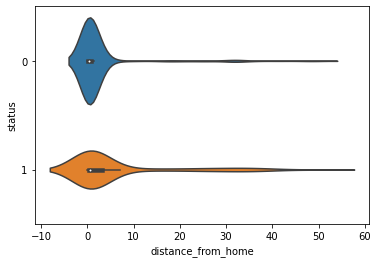

In [73]:
sns.violinplot(data=df, x='distance_from_home', y='status')
plt.show() 

In [74]:
df.pivot_table('distance_from_home','status', aggfunc='mean')

,distance_from_home
status,
0,2.295310
1,5.964294


In [75]:
df.pivot_table('distance_from_home','status', aggfunc='median')

,distance_from_home
status,
0,0.440
1,0.675


In [76]:
# employees that stayed had 2.29 miles distance from home on an average.
# employees that left the organisation had 5.69 miles distance from home on an average.

* Manager Satisfaction VS Active Status

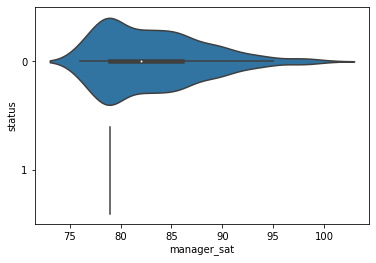

In [77]:
sns.violinplot(data=df, x='manager_sat', y='status')
plt.show() 

In [78]:
df.pivot_table('manager_sat','status', aggfunc='mean')

,manager_sat
status,
0,83.224806
1,79.000000


In [79]:
df.pivot_table('manager_sat','status', aggfunc='median')

,manager_sat
status,
0,82
1,79


In [80]:
# Assumption: It seems maximum employees with a manager_sat of 79 left.

* Employee Satisfaction VS Active Status

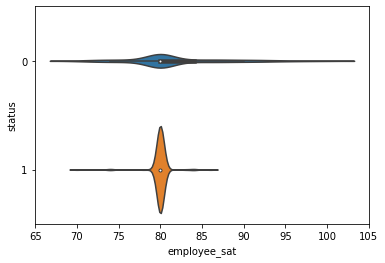

In [81]:
sns.violinplot(data=df, x='employee_sat', y='status')
plt.show() 

In [82]:
df.pivot_table('employee_sat','status', aggfunc='mean')

,employee_sat
status,
0,81.627907
1,79.958824


In [83]:
df.pivot_table('employee_sat','status', aggfunc='median')

,employee_sat
status,
0,80
1,80


In [84]:
# It seems employees do not leave based on employee_sat score.

* Bonus VS Active Status

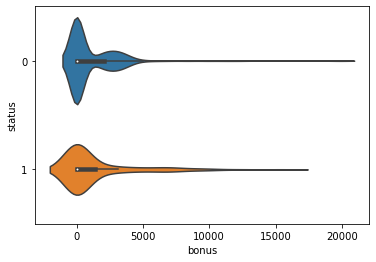

In [85]:
sns.violinplot(data=df, x='bonus', y='status')
plt.show() 

In [86]:
df.pivot_table('bonus' ,'status', aggfunc='median')

,bonus
status,
0,0
1,0


In [87]:
df.pivot_table('bonus' ,'status', aggfunc='mean')

,bonus
status,
0,1006.439922
1,1374.041176


In [88]:
# It seems employees do not leave based on bonus.

* No of Courses Taken VS Active Status

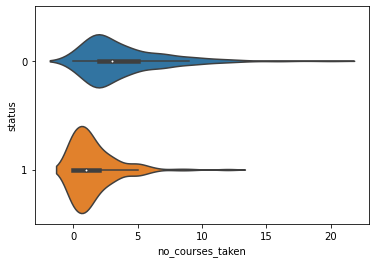

In [89]:
sns.violinplot(data=df, x='no_courses_taken', y='status')
plt.show() 

In [90]:
df.pivot_table('no_courses_taken' ,'status', aggfunc='median')

,no_courses_taken
status,
0,3
1,1


In [91]:
df.pivot_table('no_courses_taken' ,'status', aggfunc='mean')

,no_courses_taken
status,
0,3.804264
1,1.558824


In [92]:
# It seems employees do not leave based on no_courses_taken.

* Time in Position VS Active Status

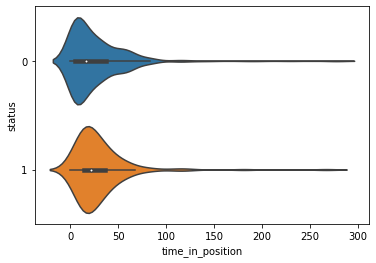

In [93]:
sns.violinplot(data=df, x='time_in_position', y='status')
plt.show() 

In [94]:
df.pivot_table('time_in_position' ,'status', aggfunc='median')

,time_in_position
status,
0,16.5
1,21.5


In [95]:
df.pivot_table('time_in_position' ,'status', aggfunc='mean')

,time_in_position
status,
0,26.637597
1,29.494118


In [96]:
# It seems employees do not leave based on their time_in_position.

* Percentage Salary Change VS Active Status

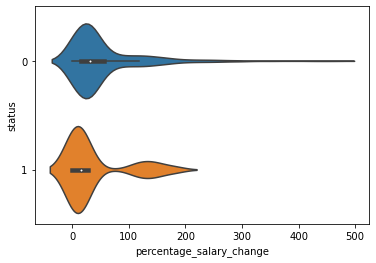

In [97]:
sns.violinplot(data=df, x='percentage_salary_change', y='status')
plt.show() 

In [98]:
df.pivot_table('percentage_salary_change','status', aggfunc='median')

,percentage_salary_change
status,
0,30.955
1,16.000


In [99]:
df.pivot_table('percentage_salary_change','status', aggfunc='mean')

,percentage_salary_change
status,
0,51.845562
1,38.197529


In [100]:
# employees that left the organisation had 2.89 % salary change on an average.
# employees that left the organisation had 5.88 % salary change on an average.
# This suggests that employees with less salary change tend to leave. 

# 8.0 Hypothesis Test 2 (Welch Two Sample T-Test for Numerical and Categorical Variables)

In [104]:
sp.stats.ttest_ind(df.query('status==0')['age'], df.query('status==1')['age'], equal_var=False)

Ttest_indResult(statistic=-0.30302035013621026, pvalue=0.7620774744278347)

In [105]:
sp.stats.ttest_ind(df.query('status==0')['distance_from_home'], df.query('status==1')['distance_from_home'], equal_var=False)

Ttest_indResult(statistic=-3.9851900818815666, pvalue=9.250369894586824e-05)

In [107]:
sp.stats.ttest_ind(df.query('status==0')['manager_changes'], df.query('status==1')['manager_changes'], equal_var=False)

Ttest_indResult(statistic=1.7954327876145335, pvalue=0.07348716517558528)